# Kernel Densities

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/KernelSpectralDensities.jl/blob/main/examples/1-densities/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelSpectralDensities.jl/dev/examples/1-densities/).*

All stationary kernels can have a spectral density, which is the Fourier transform
of the function $k(\tau) = k(x, x')$, where $\tau = t - t'$.

In other words, the spectral density is defined as
$$
  S(\omega) = \int_{-\infty}^{\infty} k(τ) e^{-2 \pi \omega^T \tau} d\tau
$$

In this notebook we show how we can recover the kernel from its spectral density.

**Load required packages**

In [1]:
using KernelSpectralDensities
using Distributions
using LinearAlgebra
using FastGaussQuadrature
using OrderedCollections

using CairoMakie
using DisplayAs #hide

## Intro
First we define a few kernels, from KernelFunctions.jl,
which is re-exported by KernelSpectralDensities.

In [2]:
kers = OrderedDict(
    "Matern3/2" => Matern32Kernel(),
    "Matern3/2 0.8" => with_lengthscale(Matern32Kernel(), 0.8),
    "Matern3/2 1.2" => with_lengthscale(Matern32Kernel(), 1.2),
);

We plot them here for illustration.

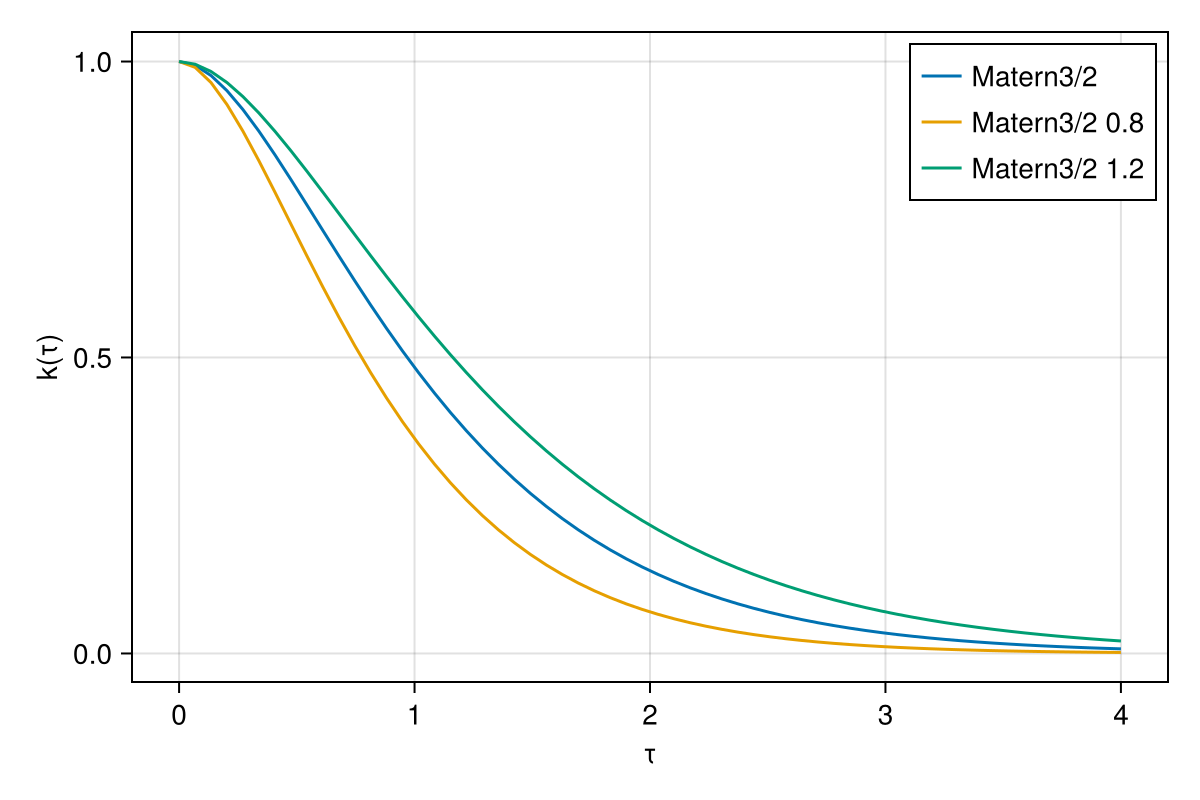

In [3]:
τ_interval = [0.0, 4.0]
τv = range(τ_interval...; length=60)

f = Figure(; size=(600, 400))
ax = Axis(f[1, 1]; xlabel="τ", ylabel="k(τ)")
for (key, ker) in kers
    lines!(ax, τv, ker.(0, τv); label=key)
end
axislegend()
f

Now we can use a function from KernelSpectralDensities.jl to
get its spectral density.
The resulting object allows us to evaluate the spectral density for any frequency.

In [4]:
S = SpectralDensity(kers["Matern3/2"], 1)
S(0.5)

0.12549068176931283

We can also plot it over the interval we defined to see its shape.

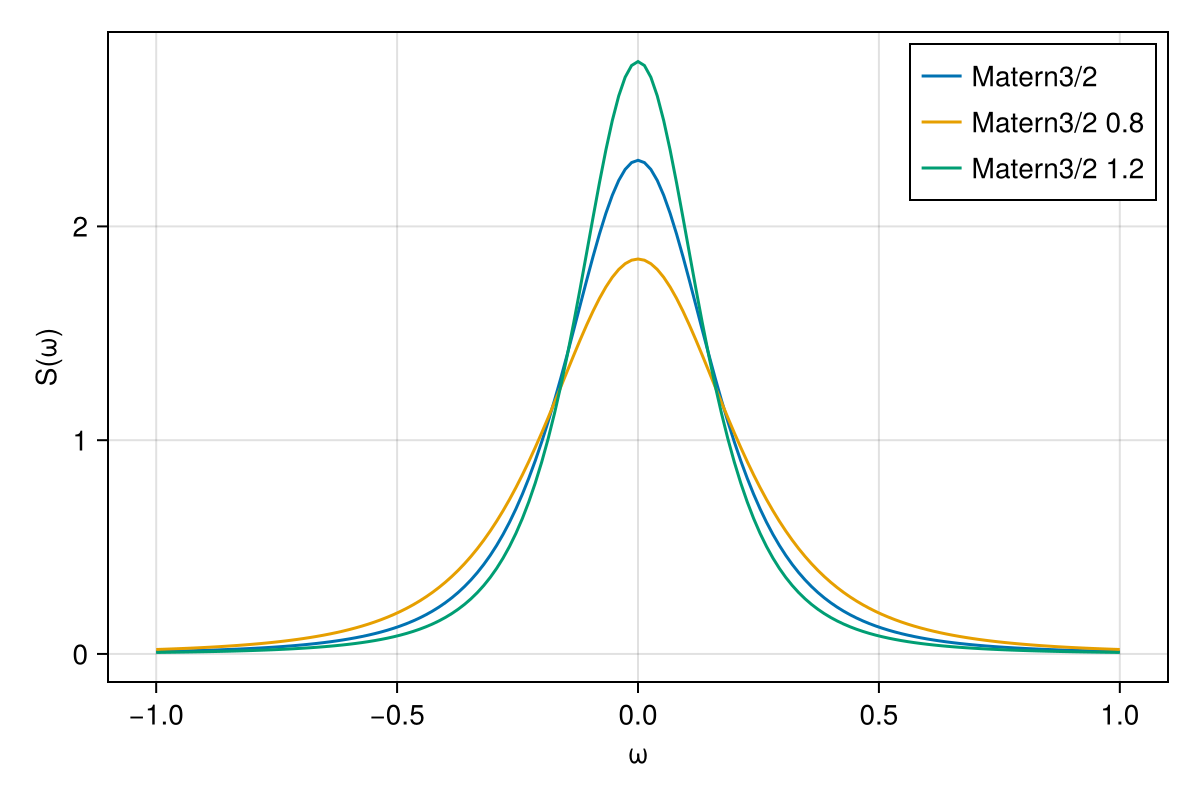

In [5]:
w_plot = range(-1, 1; length=151)

f = Figure(; size=(600, 400))
ax = Axis(f[1, 1]; xlabel="ω", ylabel="S(ω)")
for (key, ker) in kers
    Sp = SpectralDensity(ker, 1)
    lines!(ax, w_plot, Sp.(w_plot); label=key)
end
axislegend()
f

## Recovering the kernel
We can recover the kernel by integrating the spectral density over all frequencies.

First, we we define the stationary function and some interals

In [6]:
ker = kers["Matern3/2"]
k(t) = ker(0, t);

For the numerical integration we use the GaussLegendre quadrature schema,
which is more accurate and efficient than equidistant intervals.
This allows us to define a new function, which numerically approximates
the inverse Fourier transform of the spectral density.

In [7]:
w_interval = [-2.0, 2.0]
wv, weights = gausslegendre(300)
wv = (wv .+ 1) ./ 2 * (w_interval[2] - w_interval[1]) .+ w_interval[1]
c = (w_interval[2] - w_interval[1]) / 2

ks(t) = c * sum(S.(wv) .* cos.(2 * π * wv * t) .* weights);

## Results
We see that we indeed recover the kernel from the spectral density,
with only a small error from the numerical integration.

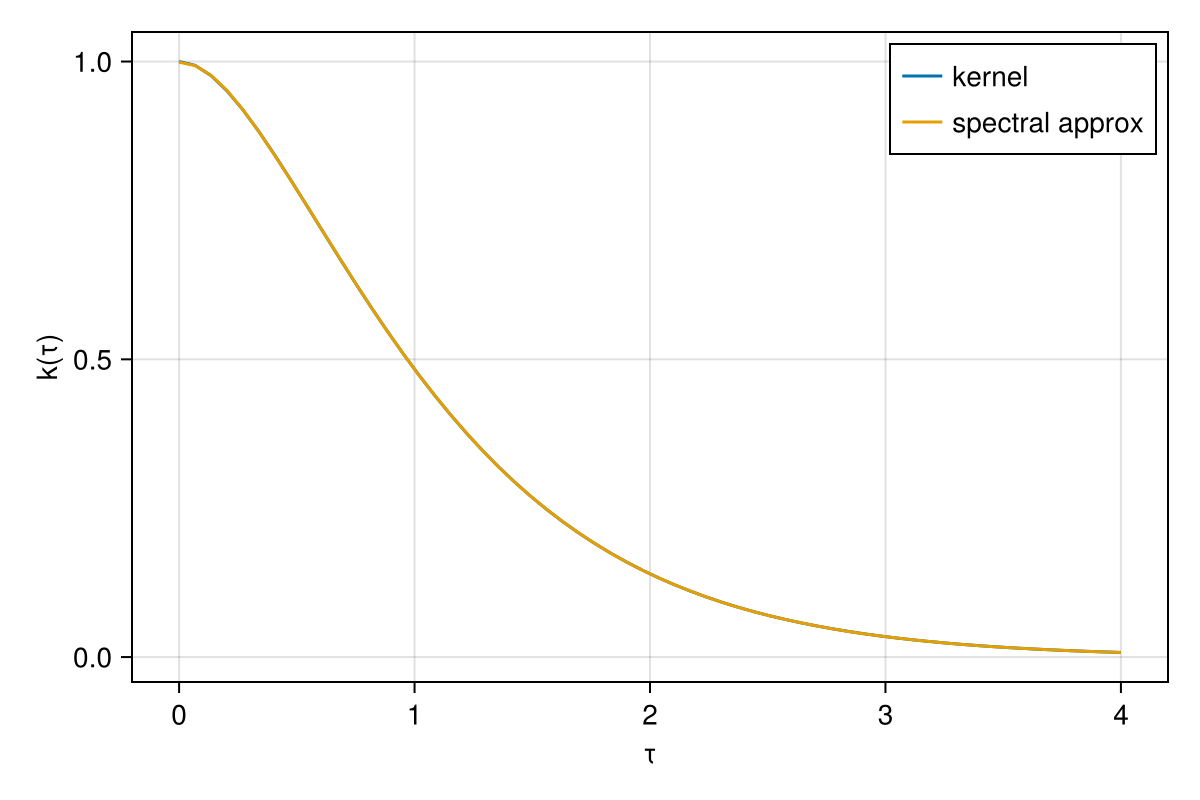

In [8]:
f = Figure(; size=(600, 400))
ax = Axis(f[1, 1]; xlabel="τ", ylabel="k(τ)")
lines!(ax, τv, k.(τv); label="kernel")
lines!(ax, τv, ks.(τv); label="spectral approx")
axislegend()
f

<hr />
<h6>Package and system information</h6>
<details>
<summary>Package information (click to expand)</summary>
<pre>
Status &#96;~/work/KernelSpectralDensities.jl/KernelSpectralDensities.jl/examples/1-densities/Project.toml&#96;
  &#91;13f3f980&#93; CairoMakie v0.13.1
  &#91;0b91fe84&#93; DisplayAs v0.1.6
  &#91;31c24e10&#93; Distributions v0.25.117
  &#91;442a2c76&#93; FastGaussQuadrature v1.0.2
  &#91;027d52a2&#93; KernelSpectralDensities v0.2.0 &#96;/home/runner/work/KernelSpectralDensities.jl/KernelSpectralDensities.jl#main&#96;
  &#91;98b081ad&#93; Literate v2.20.1
  &#91;bac558e1&#93; OrderedCollections v1.8.0
  &#91;37e2e46d&#93; LinearAlgebra v1.11.0
</pre>
To reproduce this notebook's package environment, you can
<a href="./Manifest.toml">
download the full Manifest.toml</a>.
</details>
<details>
<summary>System information (click to expand)</summary>
<pre>
Julia Version 1.11.3
Commit d63adeda50d &#40;2025-01-21 19:42 UTC&#41;
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux &#40;x86_64-linux-gnu&#41;
  CPU: 4 × AMD EPYC 7763 64-Core Processor
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 &#40;ORCJIT, znver3&#41;
Threads: 1 default, 0 interactive, 1 GC &#40;on 4 virtual cores&#41;
Environment:
  JULIA_PKG_SERVER_REGISTRY_PREFERENCE &#61; eager
  JULIA_LOAD_PATH &#61; :/home/runner/.julia/packages/JuliaGPsDocs/7M86H/src
</pre>
</details>

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*